### 简要说明
1. 本神经网络模型采用的国内外文献术后预测影响指标组合为：年龄，BMI，空腹C-肽，糖尿病病程时间，使用relu作为隐藏层的激活模型，使用mean_absolute_error作为损失函数。
2. 神经网络经常是在计算机视觉等领域作为分类器来使用，为了可以再糖尿病术后效果预测这个回归问题中使用，最后一个输出层的激活函数采用的是线性的模型。
3. 数据量较少，采用80%的数据进行建模，20%的数据作为模型的检验。


In [1]:
# 导入必要的库
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

/Users/Mac/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 获取手术相关数据
def get_combined_data():
    combined_data_path ='combined.csv'
    combined = pd.read_csv(combined_data_path)
    target = combined.target[:65]
    combined.drop(['target','id'],axis = 1 , inplace = True)
    combined.drop(combined.index,axis=0)
    return combined, target

combined, target = get_combined_data()

In [3]:
# 查看数据信息
combined.describe()

,age,duration,bmi,c-peptide
count,78.000000,78.000000,78.000000,78.000000
mean,43.974359,5.929359,30.734359,7.213333
std,9.766062,4.442389,6.273640,4.079579
min,20.000000,0.250000,21.000000,1.390000
25%,38.000000,2.000000,26.522500,4.440000
50%,43.500000,5.000000,28.420000,6.220000
75%,50.000000,8.750000,33.320000,8.835000
max,65.000000,20.000000,52.900000,20.350000


In [4]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 4
Number of nun-numerical columns with no nan values : 0


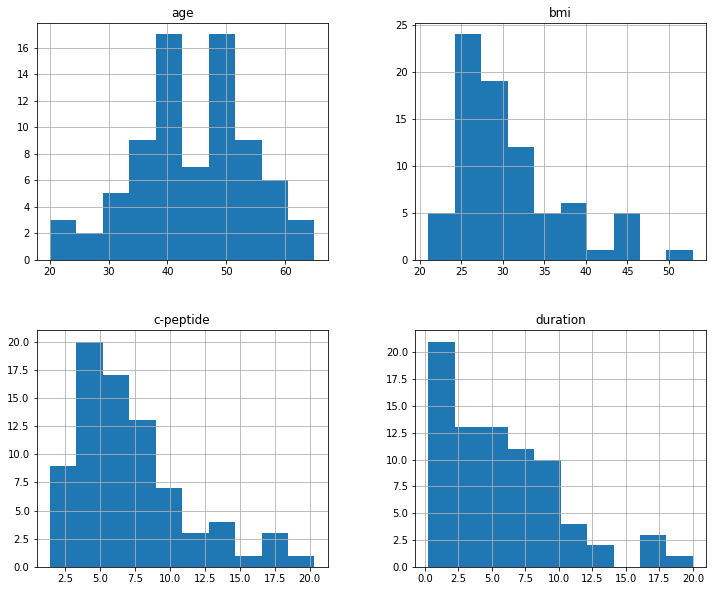

In [5]:
# 数据可视化分析
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

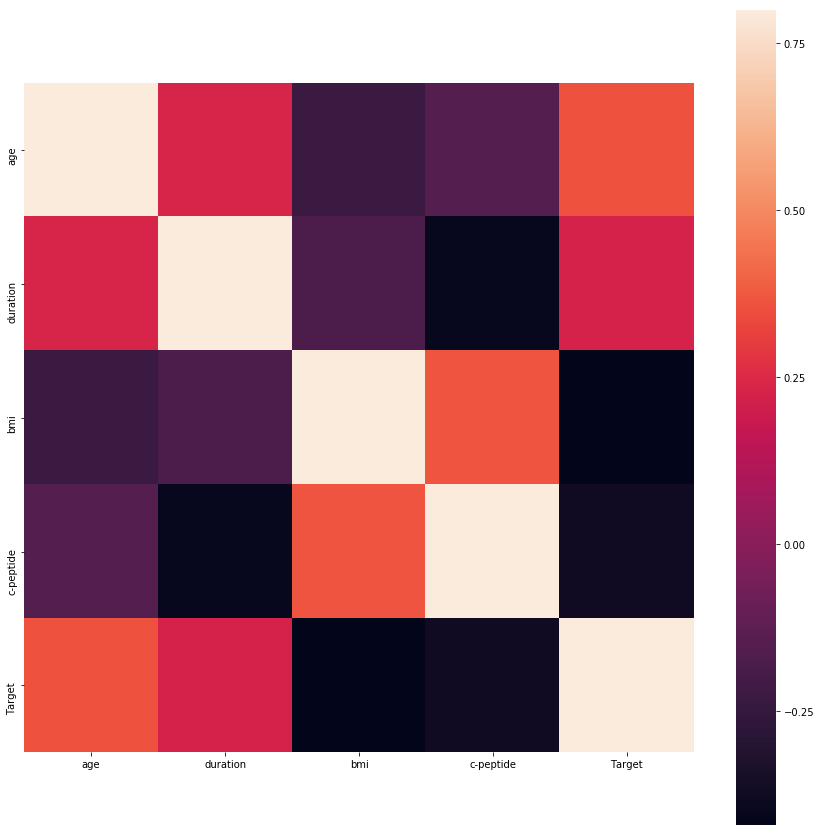

In [6]:
# 输入数据与预测值相关度分析
combined = combined[num_cols + cat_cols]
combined['Target'] = target

C_mat = combined.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [7]:
# Importing the dataset
dataset = pd.read_csv('combined.csv')
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Use relu as the activation function for the hidden layers  
Use a normal initializer as the kernal_intializer  
Use mean_absolute_error as a loss function  
Use linear as the activation function for the output layer  

In [8]:
# 搭建神经网络模型
NN_model = Sequential()
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
NN_model.fit(X_train, y_train, epochs=500, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
62/62 [==============================] - 1s 8ms/step - loss: 5.5677 - mean_absolute_error: 5.5677
Epoch 2/500
62/62 [=======

62/62 [==============================] - 0s 182us/step - loss: 0.4225 - mean_absolute_error: 0.4225
Epoch 65/500
62/62 [==============================] - 0s 177us/step - loss: 0.4082 - mean_absolute_error: 0.4082
Epoch 66/500
62/62 [==============================] - 0s 193us/step - loss: 0.4006 - mean_absolute_error: 0.4006
Epoch 67/500
62/62 [==============================] - 0s 180us/step - loss: 0.3867 - mean_absolute_error: 0.3867
Epoch 68/500
62/62 [==============================] - 0s 151us/step - loss: 0.3825 - mean_absolute_error: 0.3825
Epoch 69/500
62/62 [==============================] - 0s 180us/step - loss: 0.3941 - mean_absolute_error: 0.3941
Epoch 70/500
62/62 [==============================] - 0s 260us/step - loss: 0.3981 - mean_absolute_error: 0.3981
Epoch 71/500
62/62 [==============================] - 0s 235us/step - loss: 0.3947 - mean_absolute_error: 0.3947
Epoch 72/500
62/62 [==============================] - 0s 186us/step - loss: 0.4270 - mean_absolute_error: 0.4

62/62 [==============================] - 0s 207us/step - loss: 0.2466 - mean_absolute_error: 0.2466
Epoch 137/500
62/62 [==============================] - 0s 239us/step - loss: 0.2584 - mean_absolute_error: 0.2584
Epoch 138/500
62/62 [==============================] - 0s 187us/step - loss: 0.2882 - mean_absolute_error: 0.2882
Epoch 139/500
62/62 [==============================] - 0s 190us/step - loss: 0.3079 - mean_absolute_error: 0.3079
Epoch 140/500
62/62 [==============================] - 0s 258us/step - loss: 0.2560 - mean_absolute_error: 0.2560
Epoch 141/500
62/62 [==============================] - 0s 311us/step - loss: 0.3016 - mean_absolute_error: 0.3016
Epoch 142/500
62/62 [==============================] - 0s 206us/step - loss: 0.2767 - mean_absolute_error: 0.2767
Epoch 143/500
62/62 [==============================] - 0s 217us/step - loss: 0.2596 - mean_absolute_error: 0.2596
Epoch 144/500
62/62 [==============================] - 0s 204us/step - loss: 0.2487 - mean_absolute_er

Epoch 208/500
62/62 [==============================] - 0s 200us/step - loss: 0.1611 - mean_absolute_error: 0.1611
Epoch 209/500
62/62 [==============================] - 0s 246us/step - loss: 0.2104 - mean_absolute_error: 0.2104
Epoch 210/500
62/62 [==============================] - 0s 191us/step - loss: 0.2720 - mean_absolute_error: 0.2720
Epoch 211/500
62/62 [==============================] - 0s 185us/step - loss: 0.2188 - mean_absolute_error: 0.2188
Epoch 212/500
62/62 [==============================] - 0s 166us/step - loss: 0.3170 - mean_absolute_error: 0.3170
Epoch 213/500
62/62 [==============================] - 0s 173us/step - loss: 0.2663 - mean_absolute_error: 0.2663
Epoch 214/500
62/62 [==============================] - 0s 150us/step - loss: 0.2120 - mean_absolute_error: 0.2120
Epoch 215/500
62/62 [==============================] - 0s 188us/step - loss: 0.2672 - mean_absolute_error: 0.2672
Epoch 216/500
62/62 [==============================] - 0s 238us/step - loss: 0.2665 - me

62/62 [==============================] - 0s 182us/step - loss: 0.1151 - mean_absolute_error: 0.1151
Epoch 280/500
62/62 [==============================] - 0s 193us/step - loss: 0.1457 - mean_absolute_error: 0.1457
Epoch 281/500
62/62 [==============================] - 0s 155us/step - loss: 0.2079 - mean_absolute_error: 0.2079
Epoch 282/500
62/62 [==============================] - 0s 192us/step - loss: 0.1453 - mean_absolute_error: 0.1453
Epoch 283/500
62/62 [==============================] - 0s 192us/step - loss: 0.1499 - mean_absolute_error: 0.1499
Epoch 284/500
62/62 [==============================] - 0s 189us/step - loss: 0.1204 - mean_absolute_error: 0.1204
Epoch 285/500
62/62 [==============================] - 0s 221us/step - loss: 0.1053 - mean_absolute_error: 0.1053
Epoch 286/500
62/62 [==============================] - 0s 308us/step - loss: 0.1184 - mean_absolute_error: 0.1184
Epoch 287/500
62/62 [==============================] - 0s 250us/step - loss: 0.0968 - mean_absolute_er

Epoch 351/500
62/62 [==============================] - 0s 186us/step - loss: 0.0710 - mean_absolute_error: 0.0710
Epoch 352/500
62/62 [==============================] - 0s 166us/step - loss: 0.0744 - mean_absolute_error: 0.0744
Epoch 353/500
62/62 [==============================] - 0s 197us/step - loss: 0.0624 - mean_absolute_error: 0.0624
Epoch 354/500
62/62 [==============================] - 0s 215us/step - loss: 0.0746 - mean_absolute_error: 0.0746
Epoch 355/500
62/62 [==============================] - 0s 206us/step - loss: 0.0815 - mean_absolute_error: 0.0815
Epoch 356/500
62/62 [==============================] - 0s 156us/step - loss: 0.0937 - mean_absolute_error: 0.0937
Epoch 357/500
62/62 [==============================] - 0s 175us/step - loss: 0.1533 - mean_absolute_error: 0.1533
Epoch 358/500
62/62 [==============================] - 0s 201us/step - loss: 0.1146 - mean_absolute_error: 0.1146
Epoch 359/500
62/62 [==============================] - 0s 191us/step - loss: 0.0943 - me

62/62 [==============================] - 0s 204us/step - loss: 0.0754 - mean_absolute_error: 0.0754
Epoch 423/500
62/62 [==============================] - 0s 189us/step - loss: 0.1200 - mean_absolute_error: 0.1200
Epoch 424/500
62/62 [==============================] - 0s 197us/step - loss: 0.1036 - mean_absolute_error: 0.1036
Epoch 425/500
62/62 [==============================] - 0s 203us/step - loss: 0.0654 - mean_absolute_error: 0.0654
Epoch 426/500
62/62 [==============================] - 0s 188us/step - loss: 0.1050 - mean_absolute_error: 0.1050
Epoch 427/500
62/62 [==============================] - 0s 186us/step - loss: 0.0994 - mean_absolute_error: 0.0994
Epoch 428/500
62/62 [==============================] - 0s 166us/step - loss: 0.1404 - mean_absolute_error: 0.1404
Epoch 429/500
62/62 [==============================] - 0s 183us/step - loss: 0.1805 - mean_absolute_error: 0.1805
Epoch 430/500
62/62 [==============================] - 0s 172us/step - loss: 0.1353 - mean_absolute_er

Epoch 494/500
62/62 [==============================] - 0s 237us/step - loss: 0.1357 - mean_absolute_error: 0.1357
Epoch 495/500
62/62 [==============================] - 0s 235us/step - loss: 0.1063 - mean_absolute_error: 0.1063
Epoch 496/500
62/62 [==============================] - 0s 264us/step - loss: 0.0755 - mean_absolute_error: 0.0755
Epoch 497/500
62/62 [==============================] - 0s 198us/step - loss: 0.0485 - mean_absolute_error: 0.0485
Epoch 498/500
62/62 [==============================] - 0s 203us/step - loss: 0.0667 - mean_absolute_error: 0.0667
Epoch 499/500
62/62 [==============================] - 0s 162us/step - loss: 0.0549 - mean_absolute_error: 0.0549
Epoch 500/500
62/62 [==============================] - 0s 176us/step - loss: 0.0581 - mean_absolute_error: 0.0581


In [9]:
# 获取预测结果
y_pred = NN_model.predict(X_test)

In [10]:
# 获取真实结果
y_test = np.array(y_test).reshape(-1,1)

In [11]:
# 误差分析
y_test-y_pred

array([[ 0.2271216 ],
       [ 0.59201565],
       [-0.66859674],
       [-0.64851637],
       [ 0.40094624],
       [ 0.05747757],
       [ 1.50078993],
       [ 0.95060816],
       [-0.94438105],
       [-2.30307722],
       [-0.32200632],
       [-2.30595951],
       [ 0.09259424],
       [ 0.88548956],
       [-0.51375942],
       [-0.32830667]])

In [12]:
# 术后患者预糖血红蛋白预测结果
y_pred

array([[7.0328784],
       [5.8079844],
       [6.1685967],
       [6.4485164],
       [5.199054 ],
       [5.5425224],
       [4.29921  ],
       [4.949392 ],
       [5.644381 ],
       [6.803077 ],
       [5.7220063],
       [8.0059595],
       [5.0074058],
       [5.2145104],
       [6.7137594],
       [5.3283067]], dtype=float32)